##**07. 군집화**

###**01. K-평균 알고리즘 이해**

**K-평균**
- 군집화에서 가장 일반적으로 사용되는 알고리즘
- 군집 중심점(centroid)라는 특정한 임의의 지점을 선택하여 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법
- K-평균의 동작방법
1. 먼저 군집화의 기준이 되는 중심을 구성하려는 군집화 개수만큼 임의의 위치에 가져다 놓고, 전체 데이터를 2개로 군집화하기위해 2개의 중심을 임의의 위치에 가져다 놓음
2. 각 데이터는 가장 가까운 곳에 위치한 중심점에 소속되게 됨
3. 이렇게 소속이 결정되면 군집 중심점을 소속된 데이터의 평균 줌심으로 이동함.
4. 중심점을 이동했기 때문에 각 데이터는 기존에 속한 중심점보다 더 가까운 중심점으로 변경됨
5. 다시 중심을 소속된 데이터의 평균 중심으로 이동함
6. 만일 줌심점을 이동해도 데이터의 중심점 소속 변경이 없으면 군집화를 종료함.
- K-평균의 장점
  - 일반적인 군집화에서 가장 많이  활용되는 알고리즘
  - 알고리즘이 쉽고 간편함
- K-평균의 단점
  - 거리 기반 알고리즘으로, 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어짐
  - 반복을 수행할 때 반복 횟수가 많을 경우 수행시간이 매우 느려짐
  - 몇 개의 군집(cluster)을 선택해야 할 지 가이드하기 어려움

####**사이킷런 KMeans 소개**


In [1]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None,
                             copy_x=True, algorithm='auto')

- 중요 파라미터
  - KMeans 초기화 파라미터 중 가장 중요한 파라미터는 n_clusters이고, 이는 군집화할 개수를 의미함
  - init는 초기에 군집 중심점의 좌표를 설정할 방식을 말하며 보통은 임의로 중심을 설정하는 것이 아닌 k-means++ 를 사용함
  - max_iter은 최대 반복 횟수로, 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료함

- 비지도학습 클래스와 마찬가지로 fit(데이터 세트) 또는 fit_transform(데이터 세트)메서드를 이용하여 수행하면 됨
  - labels_: 각 데이터 포인트가 속한 군집 중심점 레이블
  - cluster_centers_: 각 군집 중심점 좌표(Shape는 [군집개수, 피처 개수]) -> 군집 중심점 좌표를 시각화 가능

####**K-평균을 이용한 붓꽃 데이터 세트 군집화**

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편한 데이터 핸들링을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [3]:
# 3개의 그룹으로 군집화 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

KMeans(n_clusters=3, random_state=0)

In [4]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [5]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


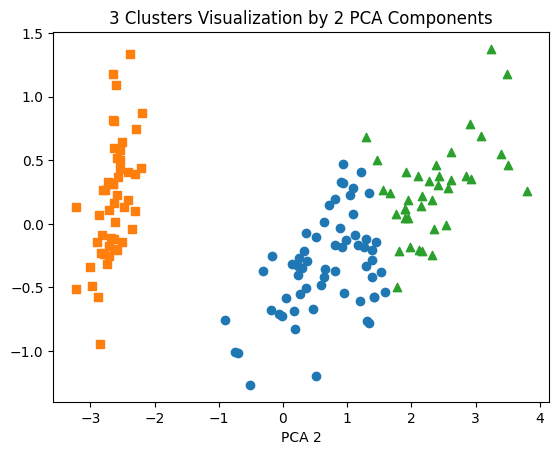

In [8]:
# 군집 값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0,1,2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o,s,^ 로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel("PCA 1")
plt.xlabel("PCA 2")
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

####**군집화 알고리즘 테스트를 위한 데이터 생성**

- 군집화 알고리즘 데이터 생성기 : make_blobs(), make_classification()
  - make_blobs(): 개별 군집의 중심점과 표준 편차 제어기능이 추가됨
      - n_samples: 생성할 총데이터 수 (디폴트:100)
      - n_features: 데이터 피처의 개수(시각화를 목표로 하면 2개로 설정)
      - centers: int값, ndarray로 표현하면 개별 군집 중심점의 좌표를 의미
      - cluster_std: 생성될 군집 데티ㅓ의 표준편차를 의미
  - make_classification(): 노이즈를 포함한 데이터를 만드는데 유용하게 사용


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target 값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [12]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


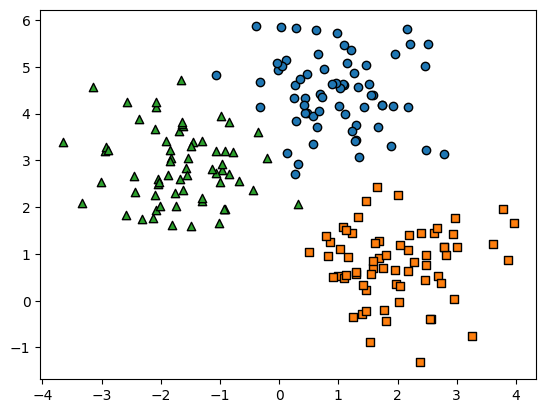

In [14]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers=['o', 's', '^', 'P', 'D', 'H', 'X']
# 3개의 군집 영억으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
# target==0, target==1, target==2로 scatterplot을 marker별로 생성.
for target in target_list:
  target_cluster = clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

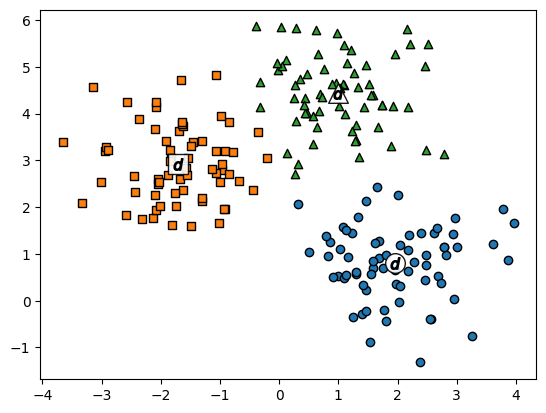

In [16]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_ 는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers= ['o', 's', '^', 'P', 'D', 'H', 'x']

# 군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행.
for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label']==label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  # 군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$d$'%label)

plt.show()

In [17]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64


###**02. 군집 평가(Cluster Evaluation)**

**실루엣 분석의 개요**
- 각 군집간의 거리가 얼마나 효율적으로 분리되어 있는지 나타냄
- 효율적으로 분리되어 있다 = 다른 군집과의 거리는 떨어져 있고, 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐 있다
- 군집화가 잘 될수록 개별 군집은 비슷한 정도의 여유공간을 가지고 떨어져 있음
- 실루엣 분석은 실루엣 계수(silhouette coefficient)를 기반으로 진행
  - 실루엣 계수
    -개별 데이터가 가지는 군집화 지수
    - 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼 있고, 다른 군집에 있는 데이터와 얼마나 멀리 분리돼 있는지를 나타내는 지표
    - -1에서 1사이의 값을 가지며, 1로 가까워질수록 근처의 군집과 더 멀리 떨어져 있다는 것이고, 0에 가까울수록 근처의 군집과 가까워진다는 걸 의미
- 좋은 군집화의 기준
1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 silhoulette_score()값은 0~1 사이의 값을 가지며, 1에 가까울수록 좋음
2. 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 함
  

**붓꽃 데이터 세트를 이용한 군집 평가**

In [26]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
# 실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names = ['epal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns = feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

# iris의 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhoulette_samples() return 값의 shape', score_samples.shape)

# irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

# 모든 데이터의 평균 실루엣 계수 값을 구함.
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score: {0:.3f}'.format(average_score))
irisDF.head(3)

silhoulette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score: 0.551


,epal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852582
1,4.9,3.0,1.4,0.2,1,0.814916
2,4.7,3.2,1.3,0.2,1,0.828797


In [27]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

,silhouette_coeff
cluster,
0,0.422323
1,0.797604
2,0.436842


**군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법**

- 전체 데이터의 평균 실루엣 계수 값이 높다고해서 반두시 최적의 군집 개수로 군집화가 잘 되었다고 볼 수 없음
   - 특정 군집 내의 실루엣 계수 값만 너무 높고, 다른 군집은 내부 데이터끼리의 거리가 너무 떨어져 있어 실루엣 계수 값이 낮아져도 평균적으로 높은 값을 가지기 때문
   - 개별 군집별로 적당히 분리된 거리를 유지하면서 군집 내의 데이터가 서로 뭉쳐 있는 경우 K-평균의 적절한 군집 개수가 설정되었다고 함
- 평균 실루엣 계수로 군집 개수를 최적화하는 방법
1. 주어진 데이터에 대해 군집 개수를 2개를 정한 경우
- 평균 실루엣 계수가 높게 나타나나, 1번 군집은 모든 데이터는 평균 실루엣 계수 값 이상이나, 2번은 평균보다 적은 데이터 값이 많은 것을 확인 가능
2. 군집의 개수가 3개인 경우
- 1번, 2번 군집은 평균보다 높은 실루엣 계수 값을 가지나 0번의 경우 모두 평균보다 낮은 것을 확인 가능
- 0 번의 데이터는 내부 데이터 간의 거리도 멀 뿐더러 2번 데이터와 상당히 가깝게 위치함
3. 군집의 개수가 4개인 경우
- 개별 군집의 평균 실루엣 계수값이 비교적 균일하게 위치한 것을 확인 가능
- 1번 군집의 경우 모든 데이터가 평균보다 높은 계수값을 가지며, 0번, 2번의 경우 절반 이상이 평균보다 높은 값을, 3번은 1/3정도가 평균보다 높은 계수값을 가짐을 확인 가능

  => 군집의 개수가 2개인 경우보다 4개인 경우가 평균 실루엣 계수값은 작으나 가장 이상적인 군집화 개수로 판단 가능함
  

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.561464362648773
For n_clusters = 6 The average silhouette_score is : 0.4857596147013469


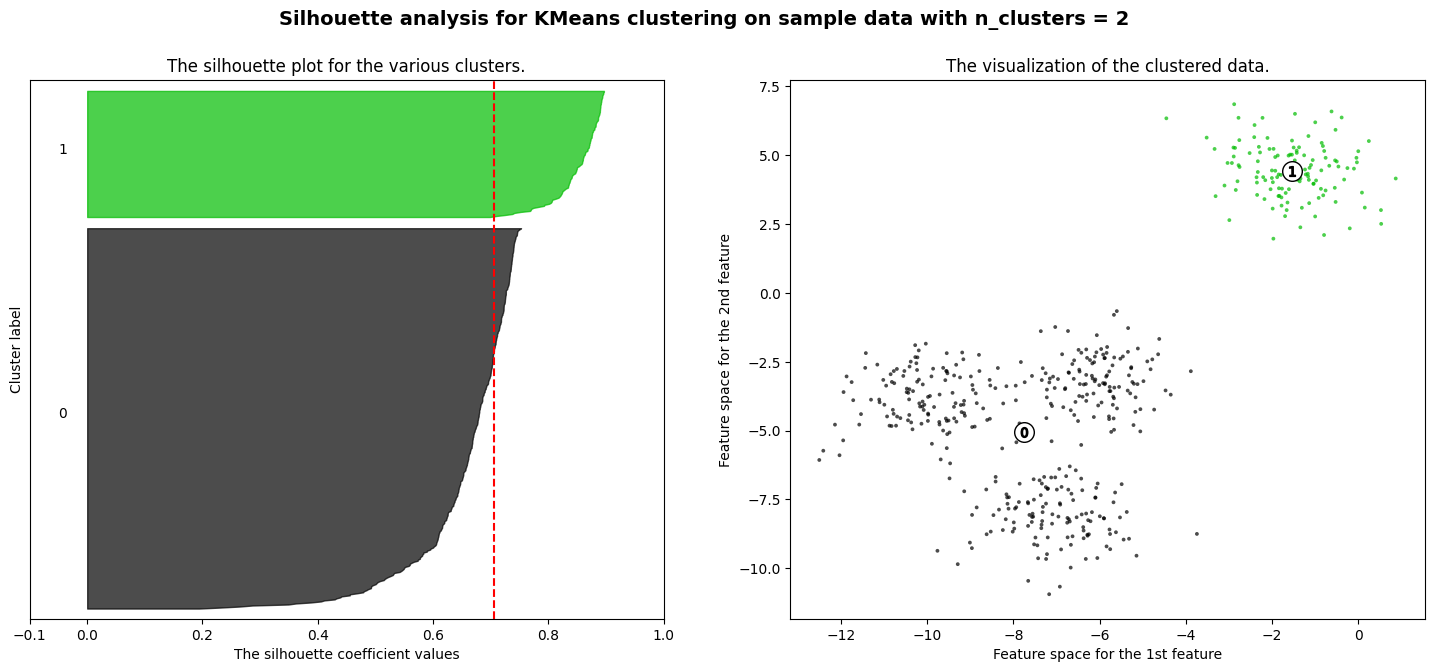

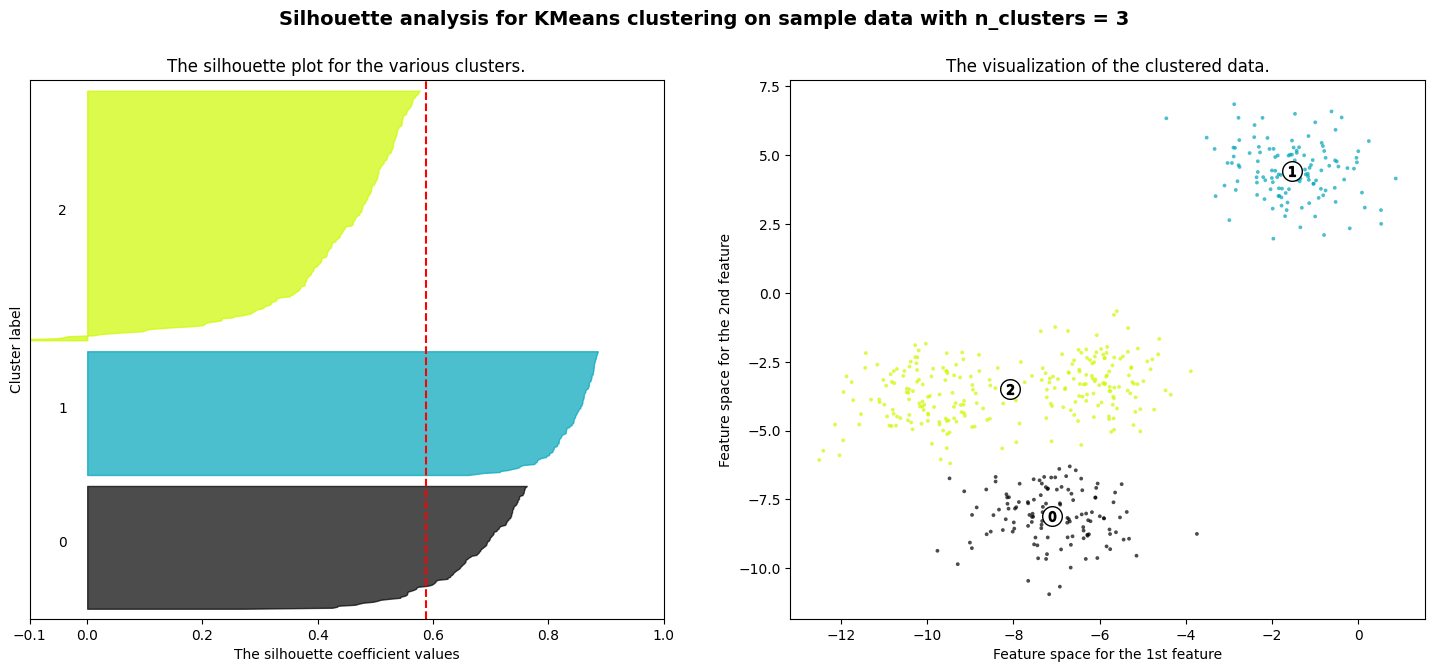

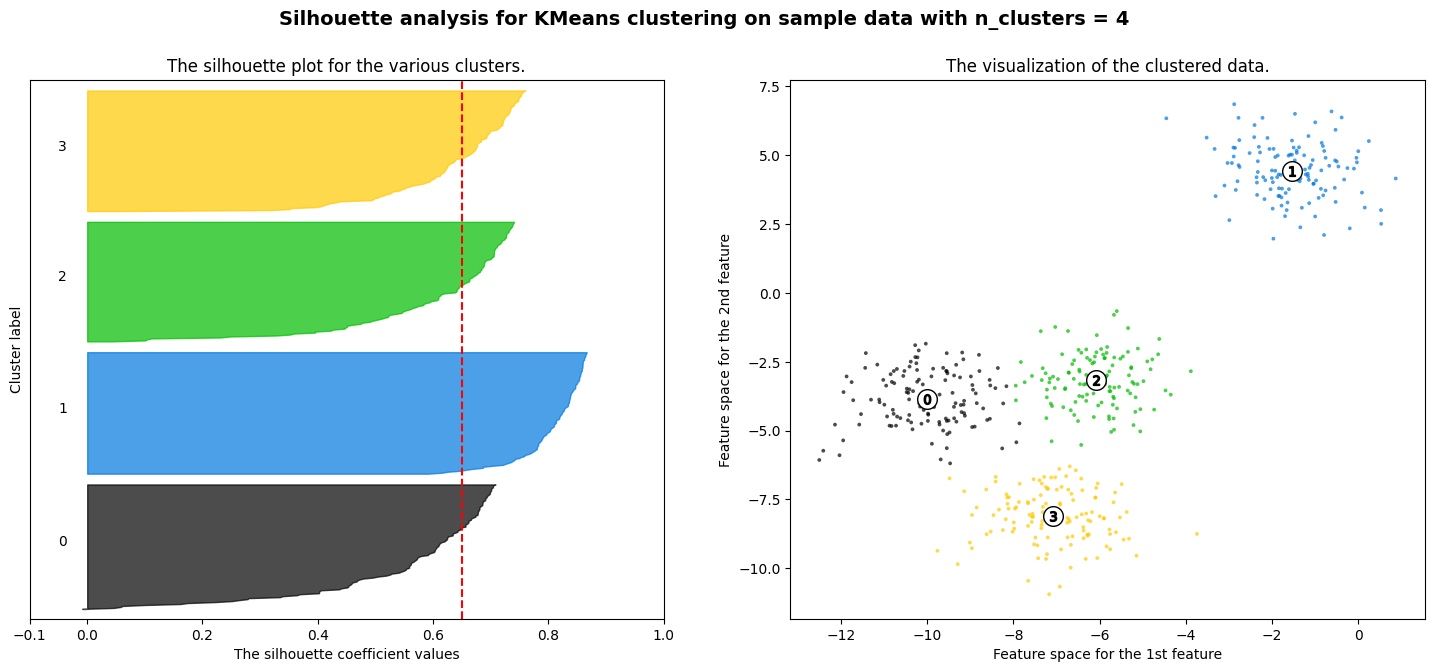

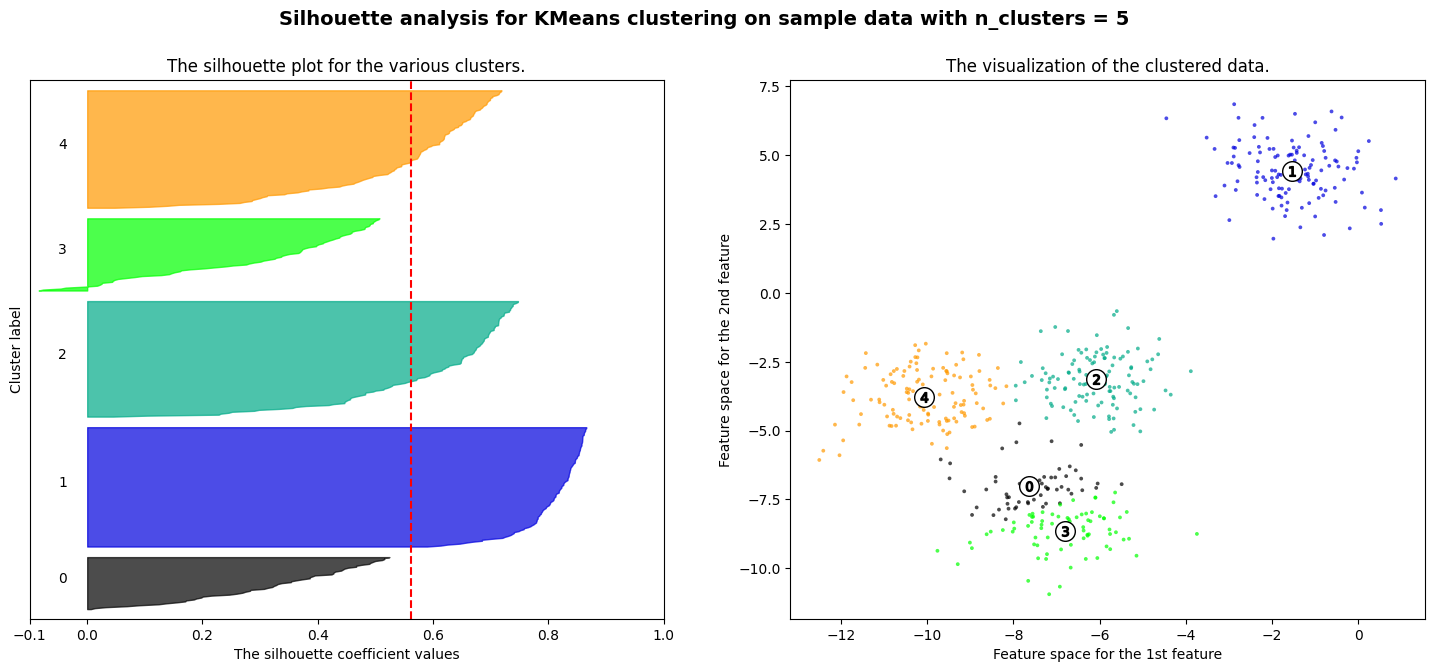

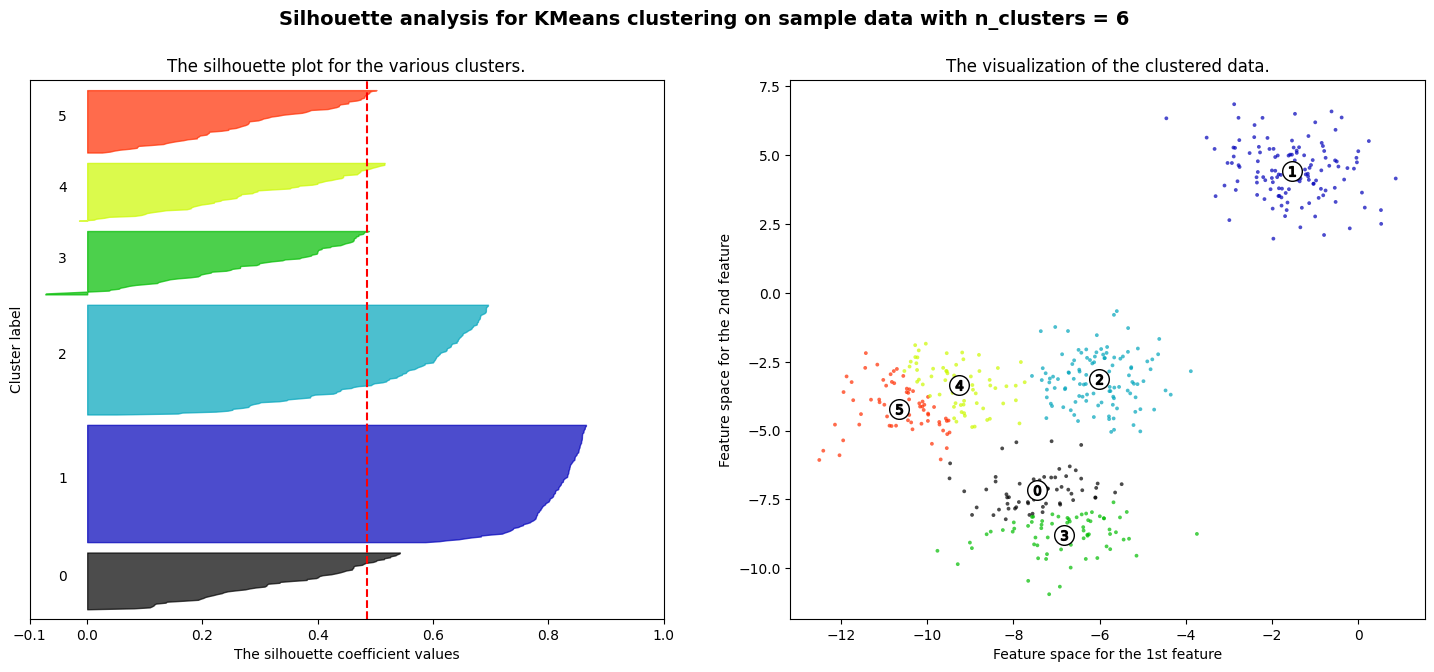

In [33]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [37]:
## 호출의 예시
#visualize_silhouette([2, 3, 4, 5], X_features)

n_clusters = 2 / silhouette score = 0.7050


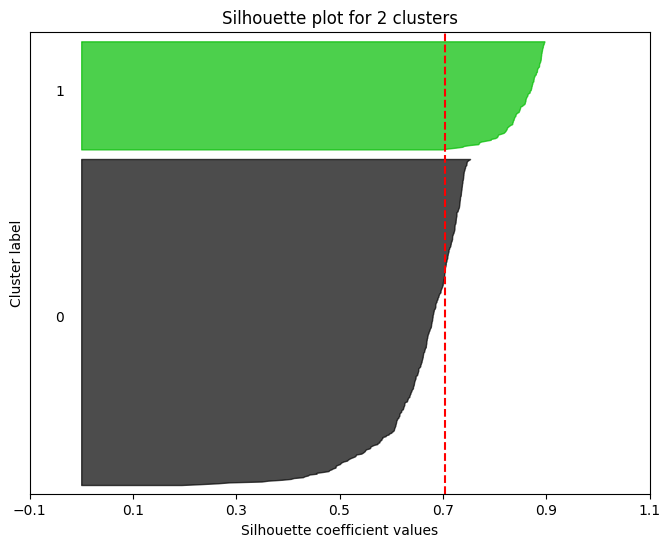

n_clusters = 3 / silhouette score = 0.5882


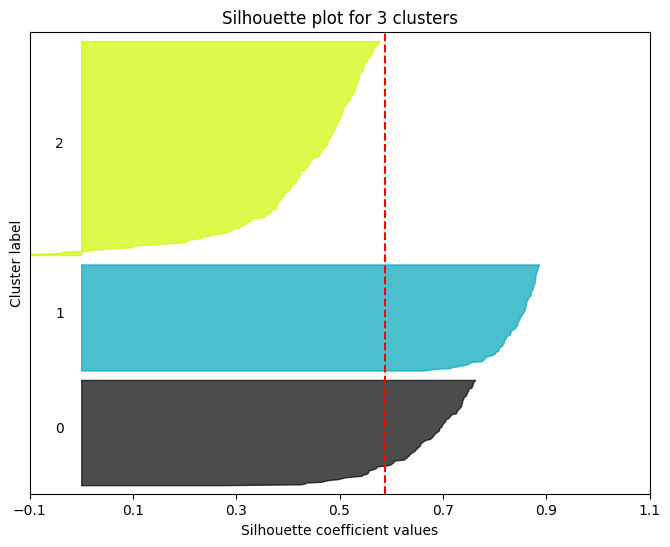

n_clusters = 4 / silhouette score = 0.6505


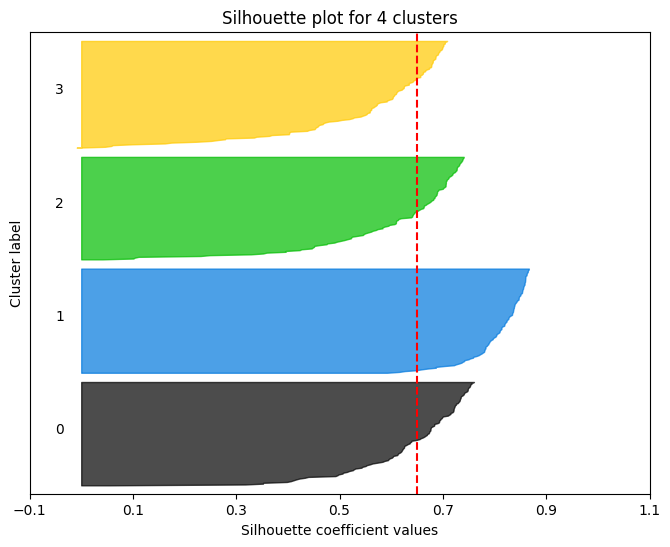

n_clusters = 5 / silhouette score = 0.5497


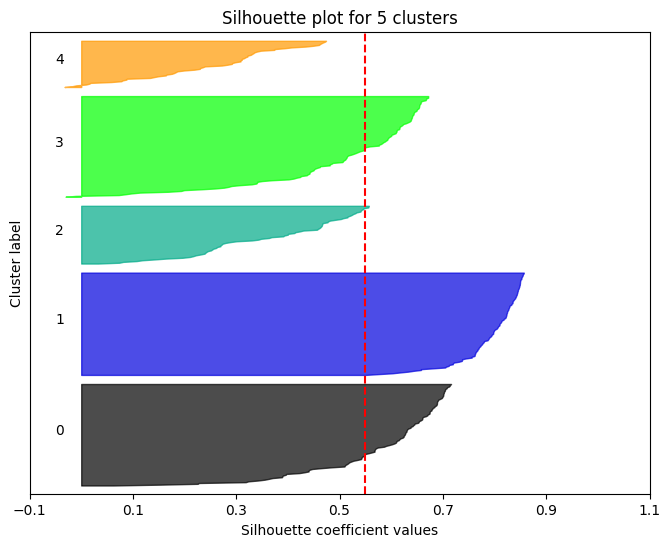

In [35]:
# make_blobs 를 통하여 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
visualize_silhouette([2, 3, 4, 5], X)

n_clusters = 2 / silhouette score = 0.6810


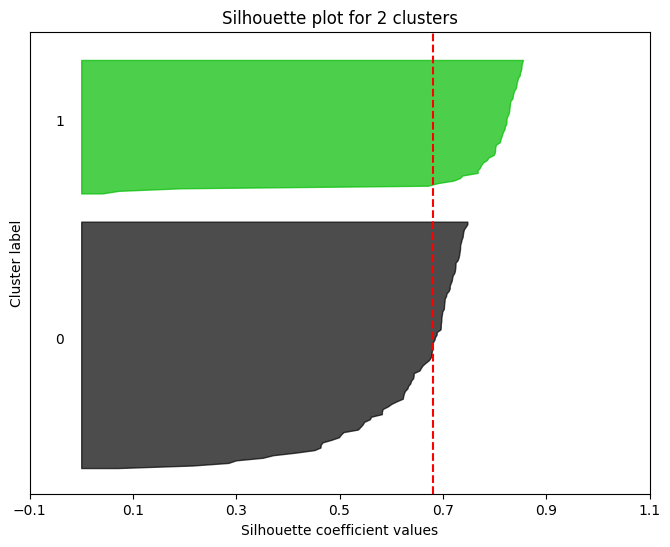

n_clusters = 3 / silhouette score = 0.5512


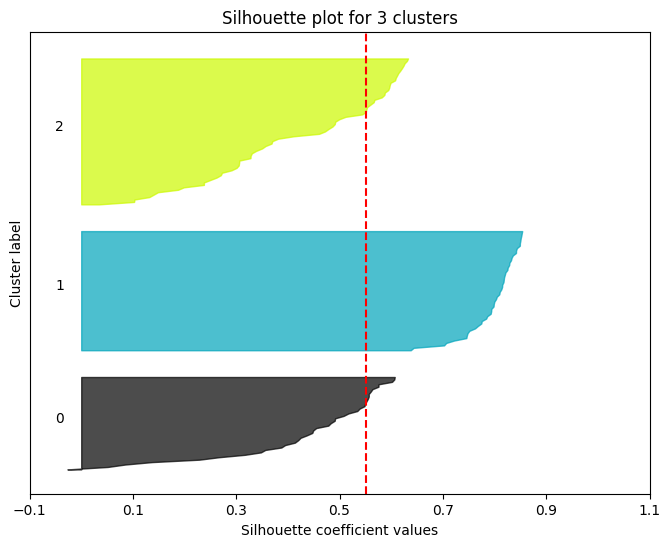

n_clusters = 4 / silhouette score = 0.4976


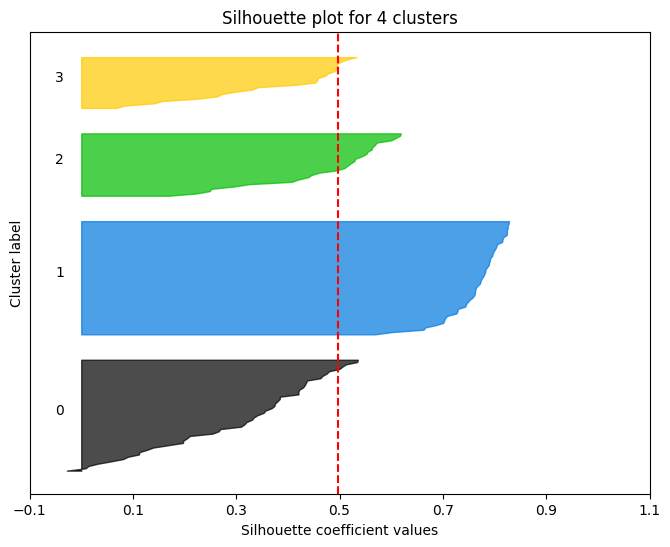

n_clusters = 5 / silhouette score = 0.4931


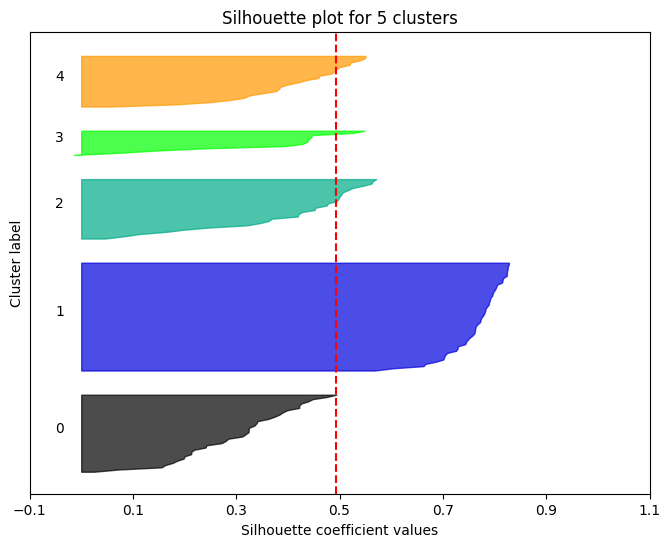

In [36]:
from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2, 3, 4, 5], iris.data)